# Titanic: Machine learn from disaster
### Main Goal
My main goal Here is to predict which elements survives on the Titanic disaster. This is a simple study project with the purpose to get familiar with machine learn basics. Throughout this work we follow the following steps:
- Collecting data from Kaggle
- Exploratory data analyses
- Modeling
- Test

## 1. Collecting data

Training and test data set can be found [here](https://www.kaggle.com/c/titanic/data).

## 2 . Exploratory data analyses

In [5]:
import pandas as pd
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.shape

(891, 12)

In [11]:
test.shape

(418, 11)

Then the train data frame has 891 rows x 12 columns and test data frame has 418 rows x 11 columns. Lets define what each one of this entries means:

- Survived: No = 0, Yes = 1,
- Pclass: 1st class = 1, 2nd class = 2, 3rd class = 3,
- Sibsp: number of siblings / spouses aboard the Titanic
- Parch: number of parents / children aboard the Titanic
- Ticket: Ticket number
- Cabin: Cabin number
- Embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

In order to found the missing values we use the method isnull() as follows

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

As we can see there are 177 rows with missing Age, 687 rows with missing Cabin and 2 rows with missing Embarked information in train data frame. We will solve this problem latter, now we first we must drop the useless data: Cabin and Name. However we cannot drop the Name column without before preserves the titles. In order to do this let us combining train and test dataset and define a new column named Title

In [ ]:
train_test = [train, test]
for data in train_test:
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [27]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Title, dtype: int64

In [28]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

So the Mr. title represents the majority in each sample. Here we just added a new column named Title as is shown below:

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [30]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


Now we ready to drop the columns Name, Embarked and Cabin

In [31]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [33]:
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [ ]:
train.drop('Embarked', axis=1, inplace=True)
test.drop('Embarked', axis=1, inplace=True)

Let us see how the data frame seems now

In [128]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,1,35.0,1,0,113803,53.1000,2
4,5,0,3,0,35.0,0,0,373450,8.0500,0


With this changes we obtained a more objective data frame and thanks for that we are already to take some important conclusions from data frame making a simple graph exploratory analyses

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

We must define variables *survived* and *dead* since this is the features we are interested in. We define a function that plot the number of *survived* and *dead* people per any feature 

In [73]:
def graph_bar(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(8,6))

We now investigate the survival rate as a function of passenger class, age group and sex and then take some conclusions 

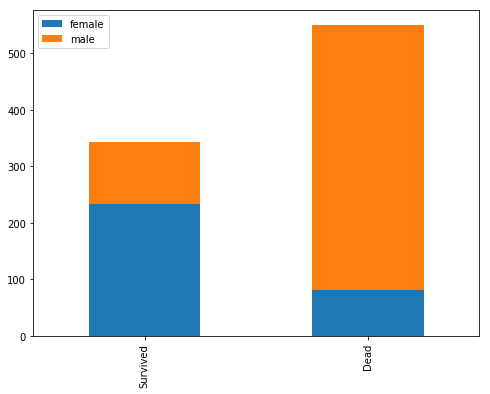

In [75]:
graph_bar('Sex')

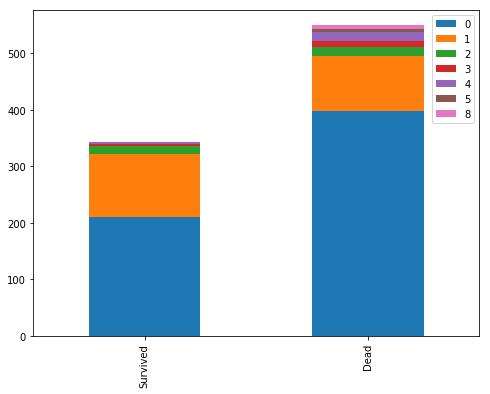

In [77]:
graph_bar('SibSp')

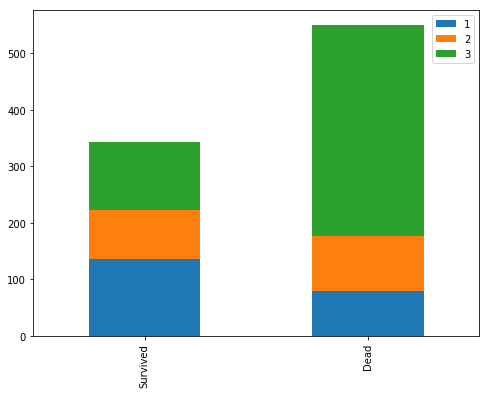

In [78]:
graph_bar('Pclass')

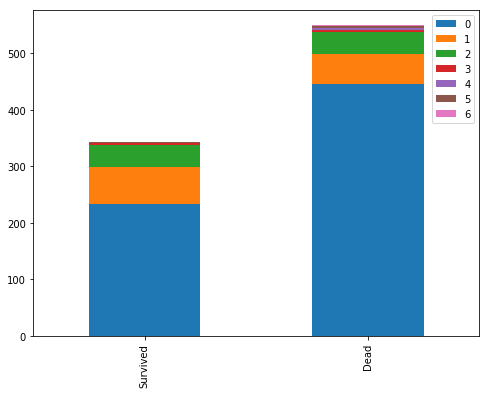

In [83]:
graph_bar("Parch")

We conclud that:
   - Women is more likely survivied than Men
   - Rich people (1st class) is more likely survivied than other classes
   - a person aboarded without siblings, spouse or childrem is more likely dead

We must replace feature entries by numerical entries which allows some algorithms in machine learning work

In [86]:
title_map = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for data in train_test:
    data['Title'] = data['Title'].map(title_map)

In [130]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,1,35.0,1,0,113803,53.1000,2
4,5,0,3,0,35.0,0,0,373450,8.0500,0
5,6,0,3,0,30.0,0,0,330877,8.4583,0
6,7,0,1,0,54.0,0,0,17463,51.8625,0
7,8,0,3,0,2.0,3,1,349909,21.0750,3
8,9,1,3,1,27.0,0,2,347742,11.1333,2
9,10,1,2,1,14.0,1,0,237736,30.0708,2


As you can see in that table, the titles was replaced by numerical values. Now we'll do the same for sex and age

In [95]:
sex_map = {"male": 0, "female": 1}
for data in train_test:
    data['Sex'] = data['Sex'].map(sex_map)

In [132]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,1,35.0,1,0,113803,53.1000,2
4,5,0,3,0,35.0,0,0,373450,8.0500,0
5,6,0,3,0,30.0,0,0,330877,8.4583,0
6,7,0,1,0,54.0,0,0,17463,51.8625,0
7,8,0,3,0,2.0,3,1,349909,21.0750,3
8,9,1,3,1,27.0,0,2,347742,11.1333,2
9,10,1,2,1,14.0,1,0,237736,30.0708,2


The sex entries was replaced by 0 = male and 1 = famale

As we have seen latter there are some missing ages in the data frame. To solve this problem we use title's median age

In [99]:
train.groupby('Title')['Age'].median()

Title
0    30.0
1    21.0
2    35.0
3     9.0
Name: Age, dtype: float64

In order to replace all ages by the Title's median age we use

In [102]:
train.groupby('Title')['Age'].transform('median').head(10)

0    30.0
1    35.0
2    21.0
3    35.0
4    30.0
5    30.0
6    30.0
7     9.0
8    35.0
9    35.0
Name: Age, dtype: float64

But we are interested in replace just the missing values, then

In [105]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [133]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,1,35.0,1,0,113803,53.1000,2
4,5,0,3,0,35.0,0,0,373450,8.0500,0
5,6,0,3,0,30.0,0,0,330877,8.4583,0
6,7,0,1,0,54.0,0,0,17463,51.8625,0
7,8,0,3,0,2.0,3,1,349909,21.0750,3
8,9,1,3,1,27.0,0,2,347742,11.1333,2
9,10,1,2,1,14.0,1,0,237736,30.0708,2


Since we already fill the missing age values we must create groups like:
- child: 0
- teenager: 1
- adult: 2
- senior: 4

In [137]:
for data in train_test:
    data.loc[ data['Age'] <= 14, 'Age'] = 0,
    data.loc[(data['Age'] > 14) & (data['Age'] <= 20), 'Age'] = 1,
    data.loc[(data['Age'] > 20) & (data['Age'] <= 60), 'Age'] = 2,
    data.loc[ data['Age'] > 60, 'Age'] = 3

In [138]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title
0,1,0,3,0,2.0,1,0,A/5 21171,7.2500,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,1,2.0,1,0,113803,53.1000,2
4,5,0,3,0,2.0,0,0,373450,8.0500,0
5,6,0,3,0,2.0,0,0,330877,8.4583,0
6,7,0,1,0,2.0,0,0,17463,51.8625,0
7,8,0,3,0,0.0,3,1,349909,21.0750,3
8,9,1,3,1,2.0,0,2,347742,11.1333,2
9,10,1,2,1,0.0,1,0,237736,30.0708,2


Since we already have informations about  Pclass we don't need to know about Fare and ticket, so we drop it

In [149]:
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [150]:
train.drop('Fare', axis=1, inplace=True)
test.drop('Fare', axis=1, inplace=True)

In [151]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Title
0,1,0,3,0,2.0,1,0,0
1,2,1,1,1,2.0,1,0,2
2,3,1,3,1,2.0,0,0,1
3,4,1,1,1,2.0,1,0,2
4,5,0,3,0,2.0,0,0,0
5,6,0,3,0,2.0,0,0,0
6,7,0,1,0,2.0,0,0,0
7,8,0,3,0,0.0,3,1,3
8,9,1,3,1,2.0,0,2,2
9,10,1,2,1,0.0,1,0,2


In [ ]:
train = train.drop(['PassengerId'], axis=1)

In [156]:
train_final = train.drop('Survived', axis=1)
target = train['Survived']

In [157]:
train_final.shape, target.shape

((891, 6), (891,))

In [160]:
train_final.head(10)

,Pclass,Sex,Age,SibSp,Parch,Title
0,3,0,2.0,1,0,0
1,1,1,2.0,1,0,2
2,3,1,2.0,0,0,1
3,1,1,2.0,1,0,2
4,3,0,2.0,0,0,0
5,3,0,2.0,0,0,0
6,1,0,2.0,0,0,0
7,3,0,0.0,3,1,3
8,3,1,2.0,0,2,2
9,2,1,0.0,1,0,2


# 4. Modelling

In [233]:
from sklearn.svm import SVC
import numpy as np

## SVM

In [234]:
model = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_final, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.84444444 0.79775281 0.82022472 0.82022472 0.82022472 0.79775281
 0.83146067 0.85393258 0.83146067 0.84269663]


In [235]:
round(np.mean(score)*100,2)

82.6

In [238]:
model = SVC()
model.fit(train_final, target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
test.drop('Embarked', axis=1, inplace=True)

In [239]:
test_data = test.drop("PassengerId", axis=1).copy()
prediction = model.predict(test_data)

In [241]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [242]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
